In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

import warnings
warnings.filterwarnings('ignore')

print(os.listdir('../data/ayame'))

FileNotFoundError: [Errno 2] No such file or directory: '../data/ayame'

In [124]:
def display():
    """This function display history of acc and loss.
    returns: two figures.
    """
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.show()

In [125]:
df_train = pd.read_csv('../data/ayame/train.tsv', delimiter='\t')
df_test = pd.read_csv('../data/ayame/test.tsv', delimiter='\t')

In [126]:
def kesson_table(df):
    total = df.isnull().sum()
    percent = total / len(df) * 100
    kesson_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    kesson_table = kesson_table.drop(kesson_table[kesson_table['Total'] == 0].index)
    return kesson_table

In [127]:
kesson_table(df_train)

,Total,Percent


In [128]:
df_train.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,Iris-setosa
1,1,6.8,2.8,4.8,1.4,Iris-versicolor
2,3,6.1,3.0,4.9,1.8,Iris-virginica
3,4,6.4,3.2,5.3,2.3,Iris-virginica
4,5,6.3,3.3,4.7,1.6,Iris-versicolor


In [129]:
df_test.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,2,6.1,2.8,4.7,1.2
1,7,6.3,2.5,4.9,1.5
2,8,6.2,3.4,5.4,2.3
3,10,6.7,3.1,4.7,1.5
4,13,5.0,3.4,1.6,0.4


In [130]:
df_train['class'].value_counts()

Iris-virginica     29
Iris-setosa        25
Iris-versicolor    21
Name: class, dtype: int64

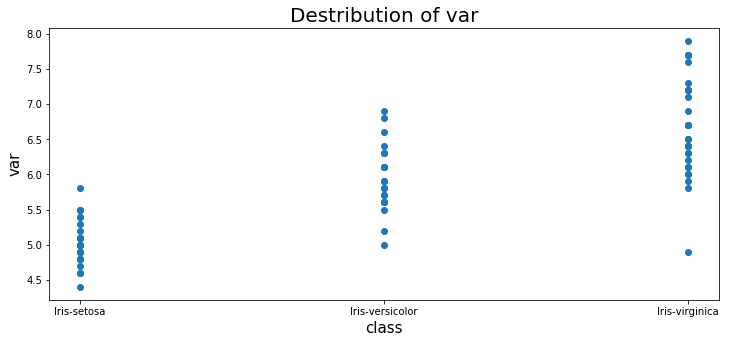

In [131]:
plt.figure(figsize=(12, 5))

plt.scatter(x='class', y='sepal length in cm', data=df_train)
plt.title('Destribution of var', fontsize=20)
plt.xlabel('class', fontsize=15)
plt.ylabel('var', fontsize=15)
plt.show()

df_train.drop(df_train[(df_train['class'] == 'Iris-virginica') & (df_train['sepal length in cm'] < 5.5)].index, inplace=True)

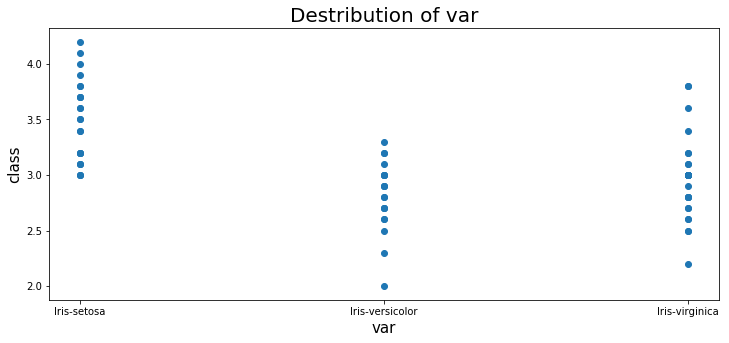

In [132]:
plt.figure(figsize=(12, 5))

plt.scatter(x='class', y='sepal width in cm', data=df_train)
plt.title('Destribution of var', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('class', fontsize=15)
plt.show()

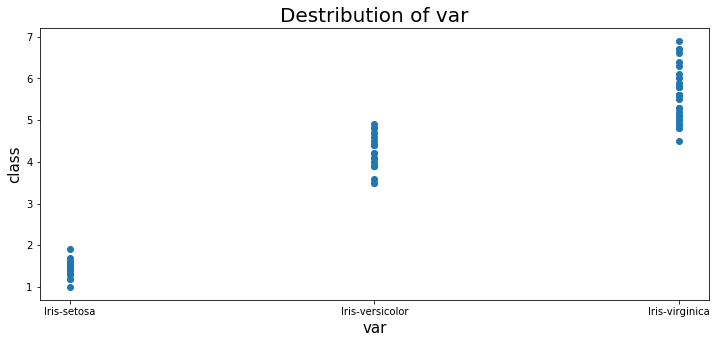

In [133]:
plt.figure(figsize=(12, 5))

plt.scatter(x='class', y='petal length in cm', data=df_train)
plt.title('Destribution of var', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('class', fontsize=15)
plt.show()

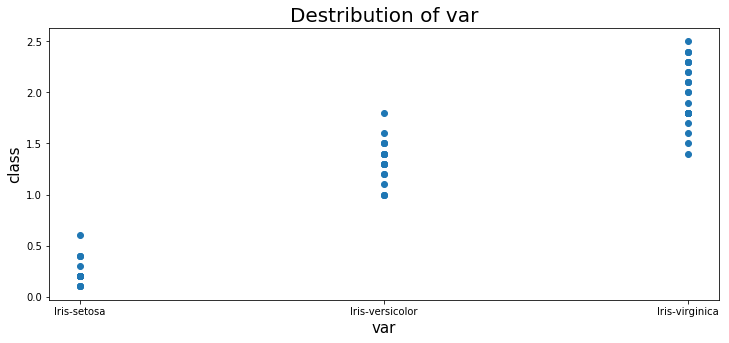

In [134]:
plt.figure(figsize=(12, 5))

plt.scatter(x='class', y='petal width in cm', data=df_train)
plt.title('Destribution of var', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('class', fontsize=15)
plt.show()

df_train['new'] = df_train['petal width in cm'] * df_train['petal length in cm']
df_test['new'] = df_test['petal width in cm'] * df_test['petal length in cm']

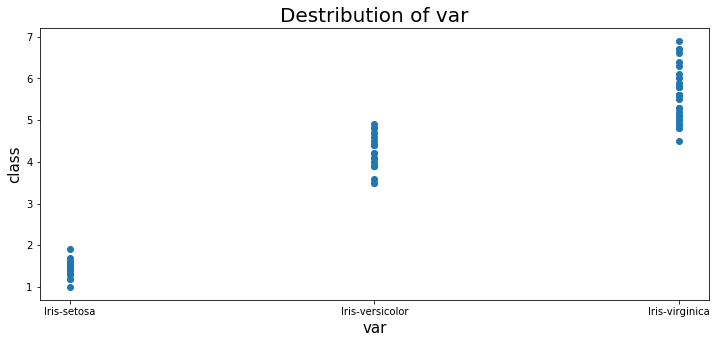

In [135]:
plt.figure(figsize=(12, 5))

plt.scatter(x='class', y='petal length in cm', data=df_train)
plt.title('Destribution of var', fontsize=20)
plt.xlabel('var', fontsize=15)
plt.ylabel('class', fontsize=15)
plt.show()

Drop = ['petal width in cm', 'petal length in cm']
df_train.drop(Drop, axis=1, inplace=True)
df_test.drop(Drop, axis=1, inplace=True)

In [136]:
import sklearn.preprocessing as prepro

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
sc = StandardScaler()
mm = MinMaxScaler()

In [138]:
train = df_train.drop(['id', 'class'], axis=1)
X_train = prepro.PolynomialFeatures(include_bias=False).fit_transform(train)

map_list = { 'Iris-virginica':0, 'Iris-setosa':1, 'Iris-versicolor':2 }
df_train['class'] = df_train['class'].map(map_list)
y_train = df_train['class'].values
y_train = np_utils.to_categorical(df_train['class'], 3)

test = df_test.drop(['id'], axis=1)
X_test = prepro.PolynomialFeatures(include_bias=False).fit_transform(test)

print(X_train.shape, y_train.shape, X_test.shape)

(75, 14) (75, 3) (75, 14)


In [139]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [140]:
model = Sequential()

model.add(Dense(14*50, activation='relu', input_dim=14, kernel_initializer='uniform'))
model.add(Dropout(0.3))
#model.add(Dense(3, activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid', kernel_initializer='uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 700)               10500     
_________________________________________________________________
dropout_7 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 2103      
Total params: 12,603
Trainable params: 12,603
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=5, epochs=500, validation_split=0.2, verbose=1)
                    
scores = model.evaluate(X_train, y_train, batch_size=30)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

Train on 60 samples, validate on 15 samples
Epoch 1/500
60/60 [==============================] - 1s 12ms/step - loss: 1.0020 - acc: 0.4500 - val_loss: 0.8661 - val_acc: 0.6000
Epoch 2/500
60/60 [==============================] - 0s 510us/step - loss: 0.6854 - acc: 0.7167 - val_loss: 0.4376 - val_acc: 0.9333
Epoch 3/500
60/60 [==============================] - 0s 532us/step - loss: 0.4809 - acc: 0.8333 - val_loss: 0.4133 - val_acc: 0.6000
Epoch 4/500
60/60 [==============================] - 0s 522us/step - loss: 0.3757 - acc: 0.8500 - val_loss: 0.2484 - val_acc: 1.0000
Epoch 5/500
60/60 [==============================] - 0s 509us/step - loss: 0.2682 - acc: 0.8667 - val_loss: 0.1902 - val_acc: 0.9333
Epoch 6/500
60/60 [==============================] - 0s 546us/step - loss: 0.2331 - acc: 0.9167 - val_loss: 0.3087 - val_acc: 0.8000
Epoch 7/500
60/60 [==============================] - 0s 531us/step - loss: 0.3131 - acc: 0.8333 - val_loss: 0.3329 - val_acc: 0.7333
Epoch 8/500
60/60 [=======

Epoch 62/500
60/60 [==============================] - 0s 817us/step - loss: 0.0636 - acc: 0.9833 - val_loss: 0.0153 - val_acc: 1.0000
Epoch 63/500
60/60 [==============================] - 0s 751us/step - loss: 0.0514 - acc: 0.9833 - val_loss: 0.0102 - val_acc: 1.0000
Epoch 64/500
60/60 [==============================] - 0s 603us/step - loss: 0.0982 - acc: 0.9667 - val_loss: 0.0092 - val_acc: 1.0000
Epoch 65/500
60/60 [==============================] - 0s 536us/step - loss: 0.1025 - acc: 0.9500 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 66/500
60/60 [==============================] - 0s 380us/step - loss: 0.0759 - acc: 0.9833 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 67/500
60/60 [==============================] - 0s 409us/step - loss: 0.0626 - acc: 0.9667 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 68/500
60/60 [==============================] - 0s 450us/step - loss: 0.0399 - acc: 1.0000 - val_loss: 0.0090 - val_acc: 1.0000
Epoch 69/500
60/60 [==============================] - 0s 374us

Epoch 123/500
60/60 [==============================] - 0s 584us/step - loss: 0.0622 - acc: 0.9833 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 124/500
60/60 [==============================] - 0s 754us/step - loss: 0.0125 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 125/500
60/60 [==============================] - 0s 916us/step - loss: 0.0248 - acc: 0.9833 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 126/500
60/60 [==============================] - 0s 547us/step - loss: 0.0495 - acc: 0.9833 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 127/500
60/60 [==============================] - 0s 863us/step - loss: 0.2671 - acc: 0.9167 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 128/500
60/60 [==============================] - 0s 829us/step - loss: 0.2420 - acc: 0.9333 - val_loss: 0.0092 - val_acc: 1.0000
Epoch 129/500
60/60 [==============================] - 0s 537us/step - loss: 0.0749 - acc: 0.9833 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 130/500
60/60 [==============================] - 

60/60 [==============================] - 0s 544us/step - loss: 0.0245 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 244/500
60/60 [==============================] - 0s 505us/step - loss: 0.0458 - acc: 0.9833 - val_loss: 5.6726e-04 - val_acc: 1.0000
Epoch 245/500
60/60 [==============================] - 0s 429us/step - loss: 0.0122 - acc: 1.0000 - val_loss: 5.0866e-04 - val_acc: 1.0000
Epoch 246/500
60/60 [==============================] - 0s 430us/step - loss: 0.0172 - acc: 1.0000 - val_loss: 4.5370e-04 - val_acc: 1.0000
Epoch 247/500
60/60 [==============================] - 0s 375us/step - loss: 0.0362 - acc: 0.9833 - val_loss: 4.9037e-04 - val_acc: 1.0000
Epoch 248/500
60/60 [==============================] - 0s 466us/step - loss: 0.0182 - acc: 1.0000 - val_loss: 4.7272e-04 - val_acc: 1.0000
Epoch 249/500
60/60 [==============================] - 0s 446us/step - loss: 0.0500 - acc: 0.9833 - val_loss: 5.7739e-04 - val_acc: 1.0000
Epoch 250/500
60/60 [========================

Epoch 362/500
60/60 [==============================] - 0s 776us/step - loss: 0.0405 - acc: 0.9833 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 363/500
60/60 [==============================] - 0s 715us/step - loss: 0.0335 - acc: 0.9833 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 364/500
60/60 [==============================] - 0s 652us/step - loss: 0.0175 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 365/500
60/60 [==============================] - 0s 611us/step - loss: 0.0506 - acc: 0.9667 - val_loss: 9.9405e-04 - val_acc: 1.0000
Epoch 366/500
60/60 [==============================] - 0s 547us/step - loss: 0.0485 - acc: 0.9833 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 367/500
60/60 [==============================] - 0s 605us/step - loss: 0.0787 - acc: 0.9667 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 368/500
60/60 [==============================] - 0s 447us/step - loss: 0.0514 - acc: 0.9833 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 369/500
60/60 [==============================

60/60 [==============================] - 0s 619us/step - loss: 0.0130 - acc: 1.0000 - val_loss: 4.4607e-04 - val_acc: 1.0000
Epoch 481/500
60/60 [==============================] - 0s 753us/step - loss: 0.0268 - acc: 0.9833 - val_loss: 3.6850e-04 - val_acc: 1.0000
Epoch 482/500
60/60 [==============================] - 0s 745us/step - loss: 0.0172 - acc: 1.0000 - val_loss: 3.0022e-04 - val_acc: 1.0000
Epoch 483/500
60/60 [==============================] - 0s 570us/step - loss: 0.0383 - acc: 0.9833 - val_loss: 2.6164e-04 - val_acc: 1.0000
Epoch 484/500
60/60 [==============================] - 0s 682us/step - loss: 0.0302 - acc: 1.0000 - val_loss: 4.9002e-04 - val_acc: 1.0000
Epoch 485/500
60/60 [==============================] - 0s 646us/step - loss: 0.0642 - acc: 0.9667 - val_loss: 5.8835e-04 - val_acc: 1.0000
Epoch 486/500
60/60 [==============================] - 0s 736us/step - loss: 0.0246 - acc: 0.9833 - val_loss: 4.6709e-04 - val_acc: 1.0000
Epoch 487/500
60/60 [====================

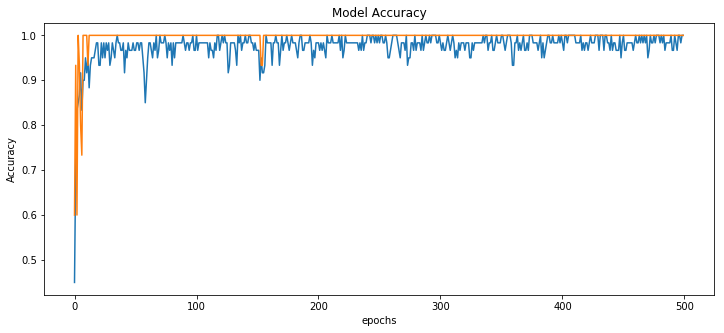

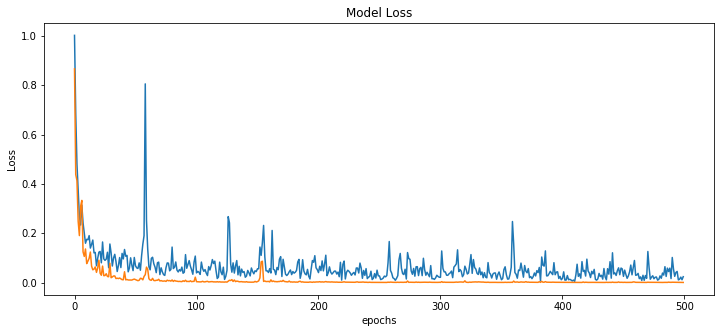

In [142]:
display()

In [143]:
predict = model.predict(X_test)
for row in predict:
    row[np.argmax(row)] = 1.0
    for j in row:
        if j != 1.0:
            j = 0

In [144]:
#predict = np.round(model.predict(X_test))
df = pd.DataFrame(predict, columns=['first', 'second', 'third'])


df['class'] = 0
df['class'][df['first'] == 1] = 'Iris-virginica'
df['class'][df['second'] == 1] = 'Iris-setosa'
df['class'][df['third'] == 1] = 'Iris-versicolor'

df_out = pd.read_csv('../data/ayame/test.tsv', delimiter='\t')
df_out = pd.concat([df_out, df], axis=1)

df_out[["id","class"]].to_csv("../data/ayame/output/submission.csv",index=False, header=False)

In [145]:
df_out['class'].value_counts()

Iris-versicolor    26
Iris-setosa        25
Iris-virginica     24
Name: class, dtype: int64